In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('cancer_reg.csv')

# Preprocessing

# 1. Ringkasan mengenai data

### A) Deskripsi setiap kelompok fitur

In [3]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [4]:
# Melihat deskripsi statistik dari kelompok fitur kategorik
display(df.describe(include=object))

,binnedInc,Geography
count,3047,3047
unique,10,3047
top,"(45201, 48021.6]","Duplin County, North Carolina"
freq,306,1


In [5]:
df.shape

(3047, 34)

### B) Jumlah Atribut

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

> Dari data diatas terlihat bahwa terdapat 32 numeric variable dan 2 categorical variable

### C) Jumlah Missing Values

In [7]:
def cek_missing_values(data):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(data)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_missing_values(df)

                         Total   Percent
PctSomeCol18_24           2285  0.749918
PctPrivateCoverageAlone    609  0.199869
PctEmployed16_Over         152  0.049885


### D) Jumlah duplikasi data

In [8]:
df.duplicated().sum()

0

### E) Kemungkinan adanya outlier

In [9]:
num_cols = df.drop(['binnedInc','Geography'],axis=1)
num_cols.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [10]:
def cek_outlier(data):
    for i in data.columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3-Q1
        RLB = Q1-1.5*IQR
        RUB = Q3+1.5*IQR
        count_outlier = ((data[i]<RLB) | (data[i]>RUB)).sum()
        print(i + " =  " + str(count_outlier))

cek_outlier(num_cols)

avgAnnCount =  461
avgDeathsPerYear =  349
TARGET_deathRate =  64
incidenceRate =  93
medIncome =  122
popEst2015 =  412
povertyPercent =  69
studyPerCap =  504
MedianAge =  93
MedianAgeMale =  89
MedianAgeFemale =  78
AvgHouseholdSize =  201
PercentMarried =  68
PctNoHS18_24 =  69
PctHS18_24 =  52
PctSomeCol18_24 =  31
PctBachDeg18_24 =  94
PctHS25_Over =  31
PctBachDeg25_Over =  82
PctEmployed16_Over =  20
PctUnemployed16_Over =  68
PctPrivateCoverage =  21
PctPrivateCoverageAlone =  4
PctEmpPrivCoverage =  9
PctPublicCoverage =  18
PctPublicCoverageAlone =  36
PctWhite =  174
PctBlack =  395
PctAsian =  323
PctOtherRace =  297
PctMarriedHouseholds =  100
BirthRate =  164


> Dari hasil diatas terlihat bahwa banyak atribute yang mempunyai outlier

# 2.Eksplorasi data

Text(0.5, 1.0, 'Correlation matrix')

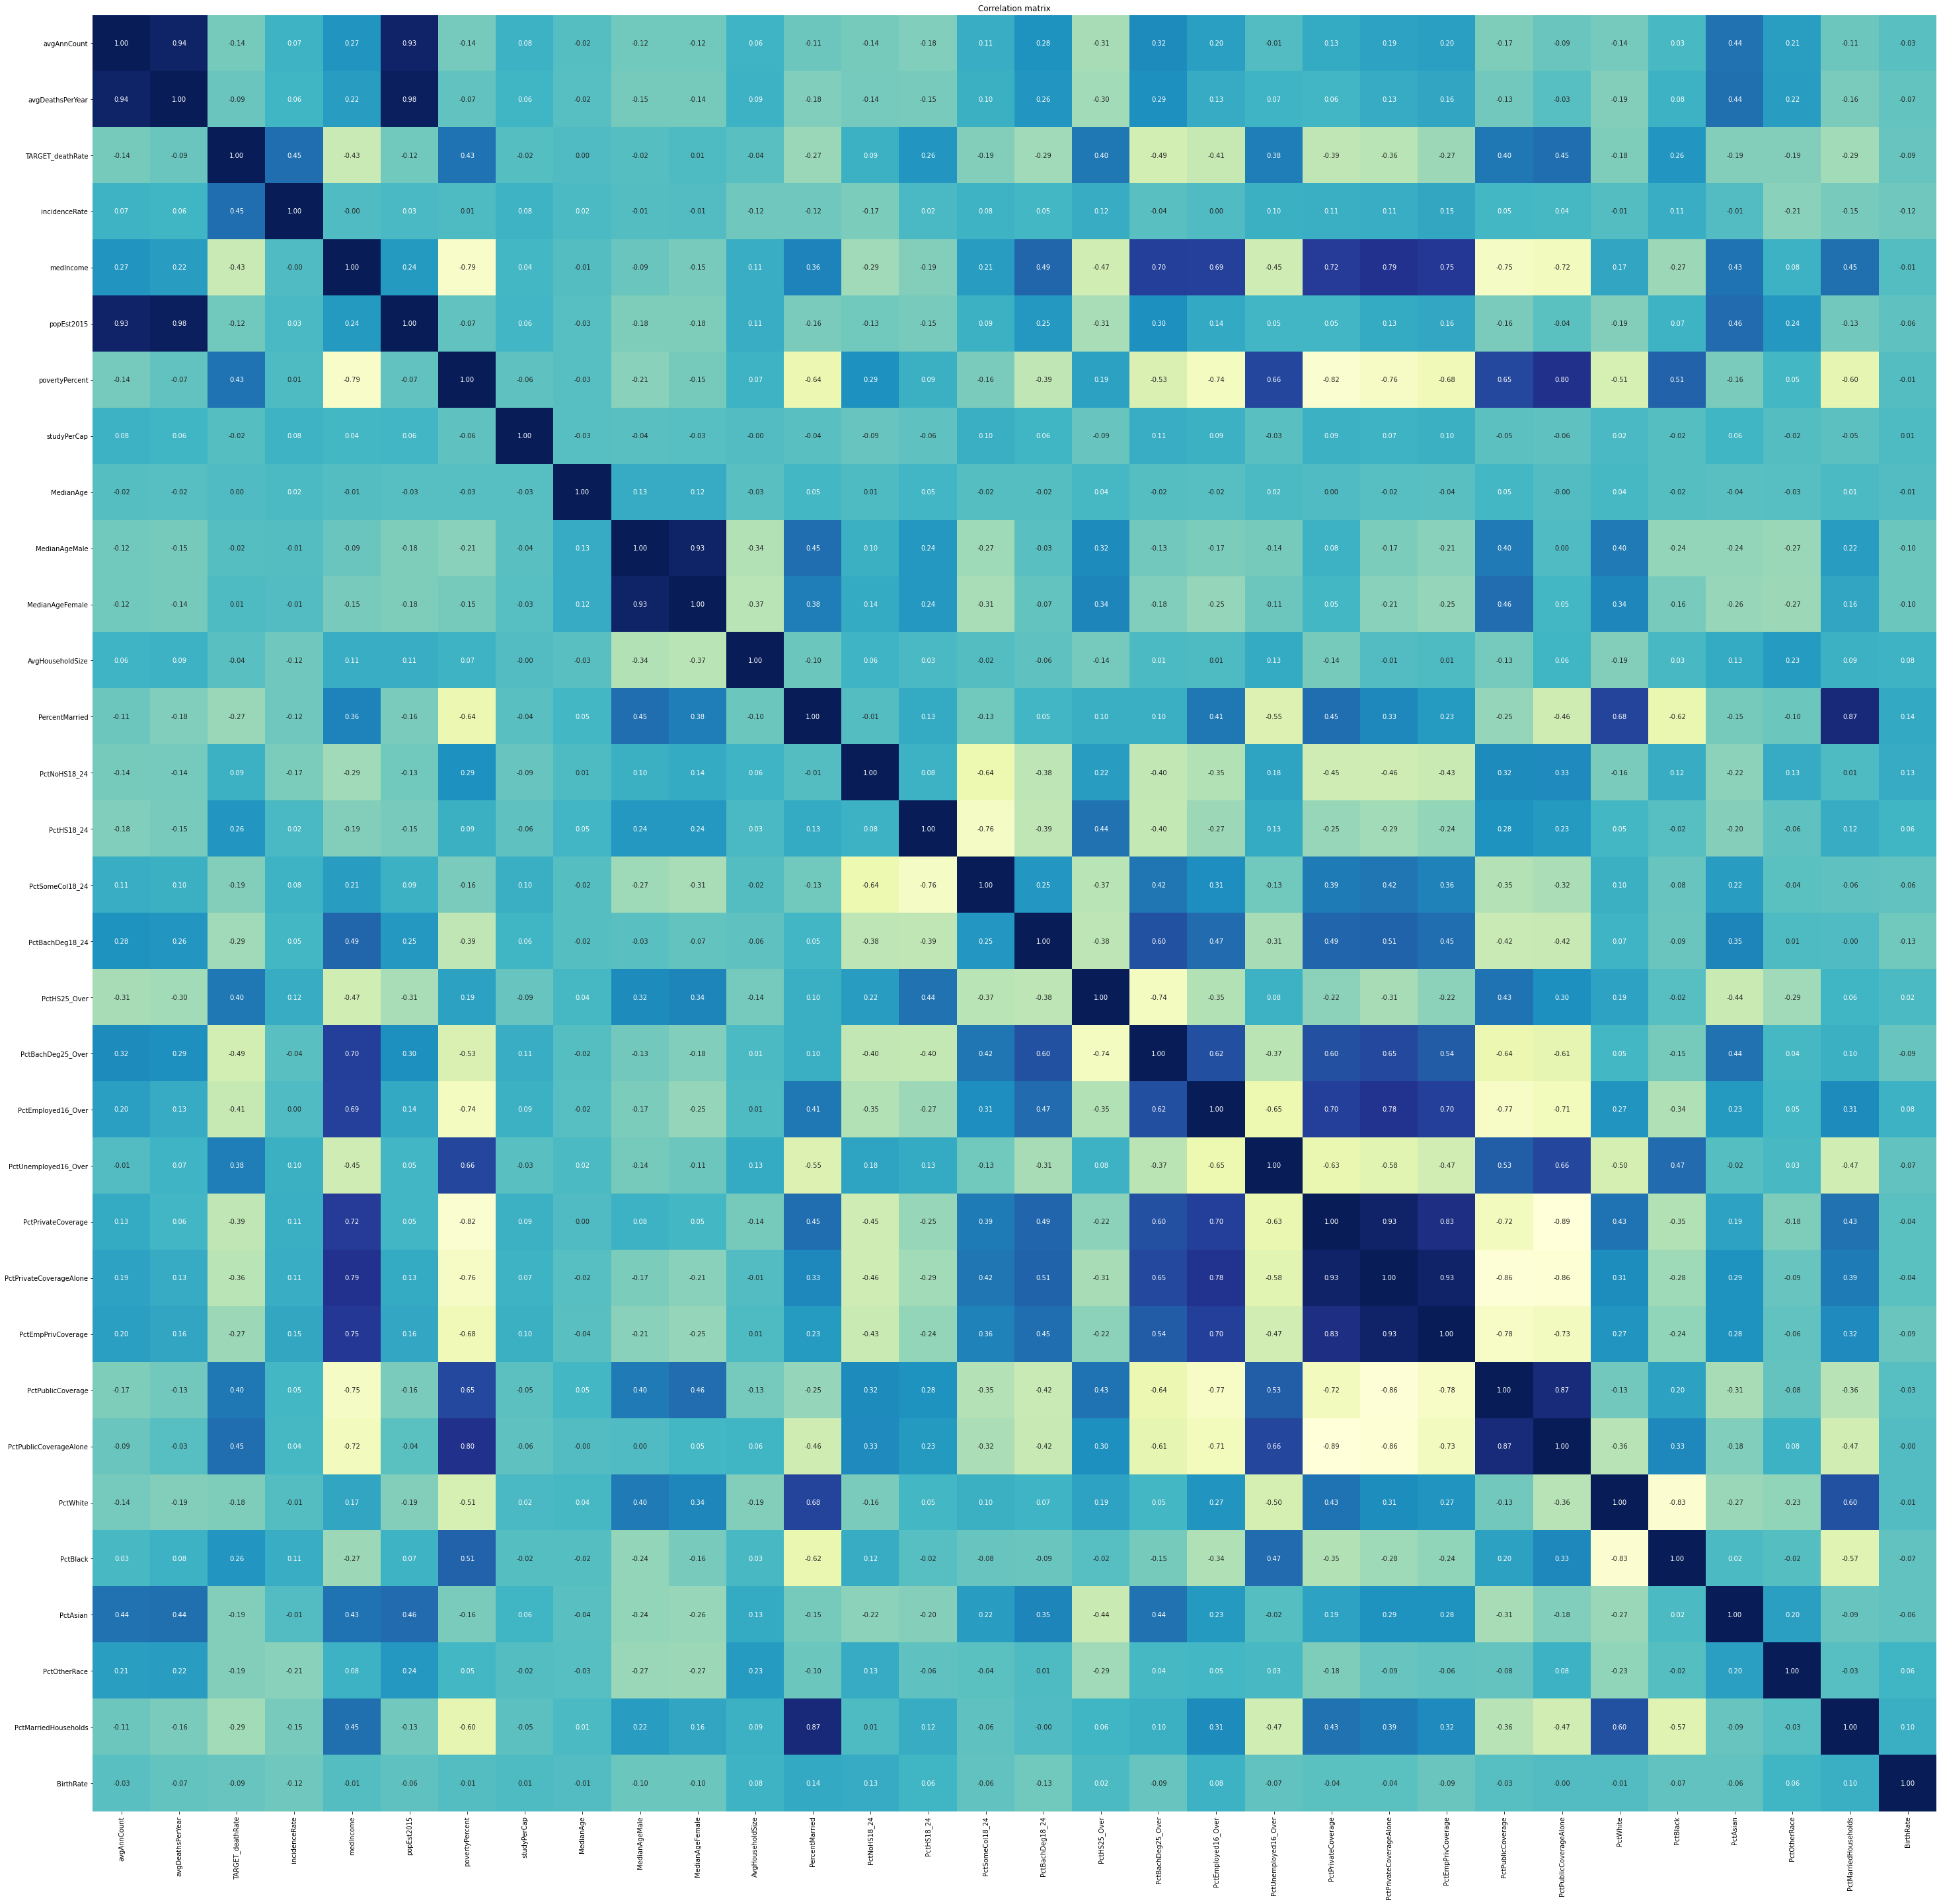

In [11]:
#Visualisasi korelasi dari setiap fitur numerik 
plt.figure(figsize=(50,50))

sns.heatmap(df.select_dtypes(np.number).corr(), 
        annot=True,
        cbar = False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df.select_dtypes(np.number).columns,
        yticklabels=df.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

Dari data diatas terlihat bahwa terdapat beberapa atribute yang memiliki beberapa korelasi tinggi. Dari nilai korelasi, terlihat
bahwa suatu fitur mempengaruhi fitur lainnya. Misalnya : avgAnnCount sangat mempengaruhi avgDeathsPerYear dengan korelasi 0.98. 
Lalu, popEst2015 mempengaruhi avgAnnCount dengan nilai korelasi 0.93 dan avgDeathsPerYear dengan korelasi 0.98. Lalu,
MedianAgeFemale juga mempengaruhi MedianAgeMAle dengan ilai korelasi 0.93. Lalu, PctPrivateCoverageAlone mempengaruhi
PctPrivateCoverage dengan nilai korelasi 0.93

# 3. Langkah Penanganan

### Menangani Missing Values

In [12]:
# Mengambil hanya fitur dengan tipe data numerik dan mengabaikan tipe data kategorik
df_numbers = df.select_dtypes(np.number)
df_numbers.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [13]:
cek_missing_values(df_numbers)

                         Total   Percent
PctSomeCol18_24           2285  0.749918
PctPrivateCoverageAlone    609  0.199869
PctEmployed16_Over         152  0.049885


> Dari data diatas terlihat bahwa terdapat 3 atribut yang memiliki missing values.
Untuk menangani missing values, terdapat beberapa cara : 

#### 1. Untuk atribut yang memiliki missing values sampai dengan lebih dari 70% seperti atribute PctSomeCol18_24, lebih baik kita 
#### drop saja kolomnya karena tidak begitu berperan besar dalam data keseluruhan

In [14]:
df_new = df_numbers.drop(['PctSomeCol18_24'],axis=1)
df_new.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


#### 2. Untuk atribut yang memiliki sedikit missing value kita dapat mengisinya dengan median/mean/null. Kita mengisi 
#### null jika kemungkinan row fitur tersebut tidak tercatat, namun jika kemungkinan atribut null karena row  data tersebut terisi
#### namun null maka kita dapat gunakan mean atau median

> Karena jumlah outliernya jauh lebih sedikit dibandingkan banyak data atau dengan kata lain datanya 
tidak skewed (they are far from being normally distributed) maka lebih baik menggunakan mean untuk mengisi datanya

In [15]:
col = ["PctPrivateCoverageAlone", "PctEmployed16_Over"]
for c in col:
    mean = df_new[c].mean()
    df_new[c] = df_new[c].fillna(mean)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

> Dari hasil diatas, terbukti bahwa tidak ada lagi missing valuew pada data

### Menangani Duplikasi data

> Karena tidak ada duplikasi data maka tidak perlu penanganan

### Menangani Outliers

In [16]:
cek_outlier(df_new)

avgAnnCount =  461
avgDeathsPerYear =  349
TARGET_deathRate =  64
incidenceRate =  93
medIncome =  122
popEst2015 =  412
povertyPercent =  69
studyPerCap =  504
MedianAge =  93
MedianAgeMale =  89
MedianAgeFemale =  78
AvgHouseholdSize =  201
PercentMarried =  68
PctNoHS18_24 =  69
PctHS18_24 =  52
PctBachDeg18_24 =  94
PctHS25_Over =  31
PctBachDeg25_Over =  82
PctEmployed16_Over =  31
PctUnemployed16_Over =  68
PctPrivateCoverage =  21
PctPrivateCoverageAlone =  60
PctEmpPrivCoverage =  9
PctPublicCoverage =  18
PctPublicCoverageAlone =  36
PctWhite =  174
PctBlack =  395
PctAsian =  323
PctOtherRace =  297
PctMarriedHouseholds =  100
BirthRate =  164


In [17]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3-Q1
RLB = Q1-1.5*IQR
RUB = Q3+1.5*IQR

#implementasi normalisasi clipping
for i in df_new.columns:
    df_new[i] = df_new[i].clip(RLB[i],RUB[i])

In [18]:
cek_outlier(df_new)

avgAnnCount =  0
avgDeathsPerYear =  0
TARGET_deathRate =  0
incidenceRate =  0
medIncome =  0
popEst2015 =  0
povertyPercent =  0
studyPerCap =  0
MedianAge =  0
MedianAgeMale =  0
MedianAgeFemale =  0
AvgHouseholdSize =  0
PercentMarried =  0
PctNoHS18_24 =  0
PctHS18_24 =  0
PctBachDeg18_24 =  0
PctHS25_Over =  0
PctBachDeg25_Over =  0
PctEmployed16_Over =  0
PctUnemployed16_Over =  0
PctPrivateCoverage =  0
PctPrivateCoverageAlone =  0
PctEmpPrivCoverage =  0
PctPublicCoverage =  0
PctPublicCoverageAlone =  0
PctWhite =  0
PctBlack =  0
PctAsian =  0
PctOtherRace =  0
PctMarriedHouseholds =  0
BirthRate =  0


In [19]:
cat_var = df.select_dtypes(include=['object'])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_var:
    cat_var[col] = label_encoder.fit_transform(cat_var[col])

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
result = [df_new,cat_var]
df_cleaned = pd.concat(result, axis=1, join='inner')
df_cleaned.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,binnedInc,Geography
0,1181.0,330.5,164.9,489.8,61898.0,154151.5,11.2,209.126941,39.3,36.9,...,32.9,14.0,81.780529,2.594728,2.671295,1.843479,52.856076,6.118831,8,1458
1,173.0,70.0,161.3,411.6,48127.0,43269.0,18.6,23.111234,33.0,32.2,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,5,1459
2,102.0,50.0,174.7,349.7,49348.0,21026.0,14.6,47.560164,45.0,44.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,5,1463
3,427.0,202.0,194.8,430.4,44243.0,75882.0,17.1,209.126941,42.8,42.2,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,3,1587
4,57.0,26.0,144.4,350.1,49955.0,10321.0,12.5,0.000000,48.3,47.8,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,5,1617


In [21]:
# Melakukan normalisasi data
sc = StandardScaler()
df_columns = df_cleaned.columns
df_scaled = sc.fit_transform(df_cleaned)
df_result = pd.DataFrame(df_scaled,columns=df_columns)
df_result= df_result.drop(['Geography'],axis=1)

>Saya drop fitur Geography karena fitur tersebut hanya menunjukan country target saja dan tidak mempengaruhi prediksi target. 
Dengan begitu, dapat menurunkan error dan meningkatkan accuracy.

## Menyiapkan Data

In [22]:
X = df_result.drop(['TARGET_deathRate'],axis=1)
y = df_result['TARGET_deathRate']

In [23]:
from sklearn.model_selection import train_test_split

#train-test stratified split using 80-20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression

# Train the model using the training sets
model = LinearRegression()
reg = model.fit(X_train, y_train)

# Make predictions using the testing set
target_deathRate_predict = reg.predict(X_test)

### A. Visualisasi hasil prediksi

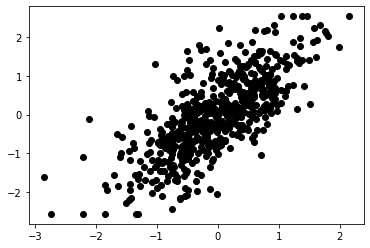

In [25]:
# Plot outputs
plt.scatter(target_deathRate_predict, y_test,  color='black')
plt.show()

### B) MSE

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('Mean Squared Error(MSE): %.10f'
      % mean_squared_error(y_test, target_deathRate_predict))

Mean Squared Error(MSE): 0.4502693092


### C) MAE 

In [27]:
print('Mean Absolute Error(MAE): %.10f'
      % mean_absolute_error(y_test, target_deathRate_predict))

Mean Absolute Error(MAE): 0.5172499361


### D) RMSE

In [28]:
print('Root Mean Squared Error(RMSE): %.10f'
      % np.sqrt(mean_squared_error(y_test, target_deathRate_predict)))

Root Mean Squared Error(RMSE): 0.6710210944


### E) R2 Square

In [29]:
print('R2 Square: %.10f'
      % r2_score(y_test, target_deathRate_predict))

R2 Square: 0.5438864523


# 2. OLS Regression

In [30]:
import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(y_train, X_train)
ols_reg = model.fit()

# Make predictions using the testing set
ols_predict = ols_reg.predict(X_test)

### A) R2 Square

In [31]:
print('R2 Square: %.10f'
      % r2_score(y_test, ols_predict))

R2 Square: 0.5439813633


# 3. Ridge Regression 

In [32]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.1,tol=0.1)
ridge_reg = clf.fit(X_train, y_train)

kof_lasso = ridge_reg.coef_
print(kof_lasso)

# Make predictions using the testing set
ridge_predict = ridge_reg.predict(X_test)

[-0.12178568  0.95600886  0.35611037 -0.03489863 -0.90725687  0.02135674
 -0.03294689 -0.03776981 -0.07453505 -0.08012505  0.00297033  0.21480106
 -0.01844002  0.07992929 -0.03269098  0.0810146  -0.17087397 -0.10614773
  0.03707182 -0.18792649  0.03723188  0.06618472 -0.07912902  0.03574882
  0.02191257  0.07902901  0.05742263 -0.12404227 -0.21503416 -0.03928708
  0.02378919]


### A) MSE

In [33]:
print('Mean Squared Error(MSE): %.10f'
      % mean_squared_error(y_test, ridge_predict))

Mean Squared Error(MSE): 0.4502250019


### B) R2 Square

In [34]:
print('R2 Square : %.10f'
      %r2_score(y_test, ridge_predict))

R2 Square : 0.5439313346


### C) Ubah Parameter TOL 

In [35]:
clf_2 = Ridge(alpha=1,tol=100000)
ridge_reg_2 = clf_2.fit(X_train, y_train)

# Make predictions using the testing set
ridge_predict_2 = ridge_reg_2.predict(X_test)

print('Mean Squared Error(MSE) change tol: %.10f' 
      % mean_squared_error(y_test, ridge_predict_2))

print('R2 Square change tol : %.10f' 
      %r2_score(y_test, ridge_predict_2))

Mean Squared Error(MSE) change tol: 0.4498542210
R2 Square change tol : 0.5443069281


> Alasan mengapa memberikan hasil yang berbeda karena Tol adalah Toleransi untuk pengoptimalan pada ridge regression: jika kita update tol lebih besar dari tol sebelumnya,  pengoptimalan kode akan  memeriksa celah ganda untuk optimalitas dan berlanjut hingga lebih besar dari tol sebelumnya sehingga penanganan errornya lebih baik. Lalu, dapat dilihat bahwa tol tidak cukup berpengaruh significant terhadap ridge. Dapat dilihat dari atas, ketika kita meningkatkan tolnya, akurasi regressi tersebut hanya sedikit lebih baik dan sedikit turun errornya

# 4. Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
clf_lasso = Lasso(alpha=0.1,tol=0.1)
lasso_reg = clf_lasso.fit(X_train, y_train)
kof_lasso = lasso_reg.coef_
print(kof_lasso)

# Make predictions using the testing set
lasso_predict = lasso_reg.predict(X_test)

[-0.          0.          0.32446445 -0.05601637 -0.          0.14252496
 -0.         -0.         -0.         -0.          0.         -0.
  0.          0.01650259 -0.          0.09738813 -0.15201958 -0.
  0.05544961 -0.00244875 -0.         -0.          0.          0.01062181
 -0.          0.         -0.         -0.         -0.         -0.
 -0.        ]


### A) R2 Square

In [37]:
print('R2 Square: %.2f'
      % r2_score(y_test, lasso_predict))

R2 Square: 0.47


### B) Ubah parameter TOL 

In [38]:
clf_lasso_2 = Ridge(alpha=0.1,tol=10000)
lasso_reg_2 = clf_lasso_2.fit(X_train, y_train)

# Make predictions using the testing set
lasso_predict_2 = lasso_reg_2.predict(X_test)

print('Mean Squared Error(MSE): %.2f'
      % mean_squared_error(y_test, lasso_predict))

print('Mean Squared Error(MSE) change tol: %.2f'
      % mean_squared_error(y_test, lasso_predict_2))

print('R2 Square change tol : %.2f'
      % r2_score(y_test, lasso_predict_2))

Mean Squared Error(MSE): 0.52
Mean Squared Error(MSE) change tol: 0.45
R2 Square change tol : 0.54


> Alasan mengapa memberikan hasil yang berbeda karena Tol adalah Toleransi untuk pengoptimalan pada Lasso regression: jika kita update tol lebih besar dari tol sebelumnya,  pengoptimalan kode akan  memeriksa celah ganda untuk optimalitas dan berlanjut hingga lebih besar dari tol sebelumnya sehingga penanganan errornya lebih baik. 
Lalu, dapat dilihat bahwa tol cukup berpengaruh significant terhadap lasso.
Dapat dilihat dari atas, ketika kita meningkatkan tolnya, akurasi regressi tersebut lebih baik dan errornya semakin turun.

# 5. Analisis hasil dan perbandingan 1,2,3,dan 4

> Dari hasil accuracy dan error diatas, dapat terlihat bahwa tidak begitu terdapat perbedaan significant pada accuracy R2 dan MSE pada linear,LOS, dan ridge regression. Namun, pada accuracy lasso terlihat terdapat perbedaan significant pada accuracy R2. Hal itu disebebakan karena tol dapat mempengaruhi accuracy dengan cukup significant pada lasso sedangkan pada ridge tol walaupun dapat meningkatkan acccuracy tetapi tidak begitu significant. Lalu, pada ridge dan lasso semakin besar nilai alpha maka nilai koef semakin kecil. Lalu, pada lasso memiliki koef 0.